In [24]:
import os
print(os.getcwd())


C:\Users\syksh\Documents\Instacart


In [25]:
import os
os.chdir('C:/Users/syksh/Documents/Instacart')  # Change this to your data folder path


In [26]:
print(os.getcwd())

C:\Users\syksh\Documents\Instacart


In [4]:
import pandas as pd

# Load each dataset
orders = pd.read_csv('orders.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
products = pd.read_csv('products.csv')
aisles = pd.read_csv('aisles.csv')  # Optional
departments = pd.read_csv('departments.csv')  # Optional

# Check if the files are loaded properly by displaying the first few rows of one file
print(orders.head())  # This will display the first 5 rows of the 'orders' DataFrame


   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  


In [27]:
import os
# List all files in the current directory
files = os.listdir()
print(files)


['aisles.csv', 'departments.csv', 'orders.csv', 'order_products__prior.csv', 'order_products__train.csv', 'products.csv', 'sample_submission.csv']


In [28]:
# Combine prior and train datasets into one
order_products = pd.concat([order_products_prior, order_products_train])

# Preview the first few rows of the combined dataset
print(order_products.head())


   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0


In [29]:
# Merge orders with order_products on 'order_id'
orders_combined = pd.merge(order_products, orders, on='order_id', how='inner')

# Preview the first few rows of the merged dataset
print(orders_combined.head())


   order_id  product_id  add_to_cart_order  reordered  user_id eval_set  \
0         2       33120                  1          1   202279    prior   
1         2       28985                  2          1   202279    prior   
2         2        9327                  3          0   202279    prior   
3         2       45918                  4          1   202279    prior   
4         2       30035                  5          0   202279    prior   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  
0             3          5                  9                     8.0  
1             3          5                  9                     8.0  
2             3          5                  9                     8.0  
3             3          5                  9                     8.0  
4             3          5                  9                     8.0  


In [8]:
# Merge with products to include product names
orders_with_products = pd.merge(orders_combined, products, on='product_id', how='inner')

# Preview the first few rows
print(orders_with_products.head())


   order_id  product_id  add_to_cart_order  reordered  user_id eval_set  \
0         2       33120                  1          1   202279    prior   
1         2       28985                  2          1   202279    prior   
2         2        9327                  3          0   202279    prior   
3         2       45918                  4          1   202279    prior   
4         2       30035                  5          0   202279    prior   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  \
0             3          5                  9                     8.0   
1             3          5                  9                     8.0   
2             3          5                  9                     8.0   
3             3          5                  9                     8.0   
4             3          5                  9                     8.0   

            product_name  aisle_id  department_id  
0     Organic Egg Whites        86             16  
1  Mic

In [30]:
# Merge with aisles and departments (optional, for additional detail)
orders_full = pd.merge(orders_with_products, aisles, on='aisle_id', how='left')
orders_full = pd.merge(orders_full, departments, on='department_id', how='left')

# Preview the final combined dataset
print(orders_full.head())


   order_id  product_id  add_to_cart_order  reordered  user_id eval_set  \
0         2       33120                  1          1   202279    prior   
1         2       28985                  2          1   202279    prior   
2         2        9327                  3          0   202279    prior   
3         2       45918                  4          1   202279    prior   
4         2       30035                  5          0   202279    prior   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  \
0             3          5                  9                     8.0   
1             3          5                  9                     8.0   
2             3          5                  9                     8.0   
3             3          5                  9                     8.0   
4             3          5                  9                     8.0   

            product_name  aisle_id  department_id               aisle  \
0     Organic Egg Whites        86   

In [10]:
# Check the shape of the final dataset
print(orders_full.shape)

# Display the first few rows
print(orders_full.head())


(33819106, 15)
   order_id  product_id  add_to_cart_order  reordered  user_id eval_set  \
0         2       33120                  1          1   202279    prior   
1         2       28985                  2          1   202279    prior   
2         2        9327                  3          0   202279    prior   
3         2       45918                  4          1   202279    prior   
4         2       30035                  5          0   202279    prior   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  \
0             3          5                  9                     8.0   
1             3          5                  9                     8.0   
2             3          5                  9                     8.0   
3             3          5                  9                     8.0   
4             3          5                  9                     8.0   

            product_name  aisle_id  department_id               aisle  \
0     Organic Egg Whit

In [33]:
# Calculate Monetary: Total number of products purchased by each customer
monetary = orders_full.groupby('user_id')['product_id'].count().reset_index()
monetary.columns = ['user_id', 'monetary']

# Merge the Monetary DataFrame with the existing RFM DataFrame
rfm = pd.merge(rfm, monetary, on='user_id')


In [34]:
# Assign scores based on quartiles
rfm['recency_score'] = pd.qcut(rfm['recency'], q=4, labels=[4, 3, 2, 1])  # Higher score for more recent purchases
rfm['frequency_score'] = pd.qcut(rfm['frequency'], q=4, labels=[1, 2, 3, 4])  # Higher score for more frequent purchases
rfm['monetary_score'] = pd.qcut(rfm['monetary'], q=4, labels=[1, 2, 3, 4])  # Higher score for higher spending


In [35]:
# Combine RFM scores into a single RFM score
rfm['RFM_score'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str)


In [38]:
# Define customer segments based on RFM_score
def segment_customer(rfm_score):
    if rfm_score == '444':
        return 'High Value'
    elif rfm_score in ['344', '434', '443']:
        return 'Loyal'
    elif rfm_score in ['144', '214', '124']:
        return 'At Risk'
    else:
        return 'Other'

# Apply the function to create the 'segment' column
rfm['segment'] = rfm['RFM_score'].apply(segment_customer)
                    

In [12]:
# Commenting out the entire chunk
# from sklearn.cluster import KMeans
#
# # Use K-Means clustering to segment customers (for example, 3 clusters)
# kmeans = KMeans(n_clusters=3)
# rfm['cluster'] = kmeans.fit_predict(rfm[['recency', 'frequency']])
#
# # Preview the clusters
# print(rfm.head())



   user_id  recency  frequency  cluster
0        1      0.0         11        0
1        2      3.0         15        0
2        3      7.0         12        0
3        4      0.0          5        0
4        5      6.0          5        0


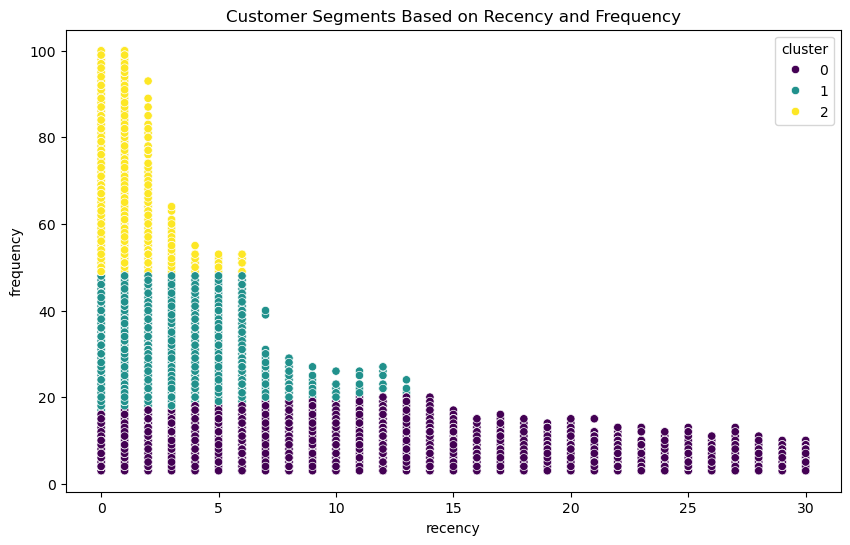

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of recency vs frequency with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='recency', y='frequency', hue='cluster', data=rfm, palette='viridis')
plt.title('Customer Segments Based on Recency and Frequency')
plt.show()


In [14]:
# Calculate the mean recency and frequency for each cluster
cluster_summary = rfm.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'user_id': 'count'  # Number of customers in each cluster
}).reset_index()

# Preview cluster summary
print(cluster_summary)


   cluster   recency  frequency  user_id
0        0  7.900446   8.153110   147267
1        1  1.733427  28.468234    47094
2        2  0.443957  67.919986    11848


In [15]:
# Define labels for clusters
rfm['customer_segment'] = rfm['cluster'].map({
    0: 'Loyal Customers',
    1: 'At-Risk Customers',
    2: 'Occasional Customers'
})

# Preview with labels
print(rfm[['user_id', 'recency', 'frequency', 'customer_segment']].head())


   user_id  recency  frequency customer_segment
0        1      0.0         11  Loyal Customers
1        2      3.0         15  Loyal Customers
2        3      7.0         12  Loyal Customers
3        4      0.0          5  Loyal Customers
4        5      6.0          5  Loyal Customers


In [16]:
# Merge RFM with orders_full to get product preferences by segment
rfm_orders = pd.merge(orders_full, rfm, on='user_id')

# Group by customer_segment and department to see product preferences
product_preferences = rfm_orders.groupby(['customer_segment', 'department']).size().reset_index(name='counts')

# Preview the product preferences
print(product_preferences.head())


    customer_segment department   counts
0  At-Risk Customers    alcohol    63567
1  At-Risk Customers     babies   187418
2  At-Risk Customers     bakery   498324
3  At-Risk Customers  beverages  1145086
4  At-Risk Customers  breakfast   300070


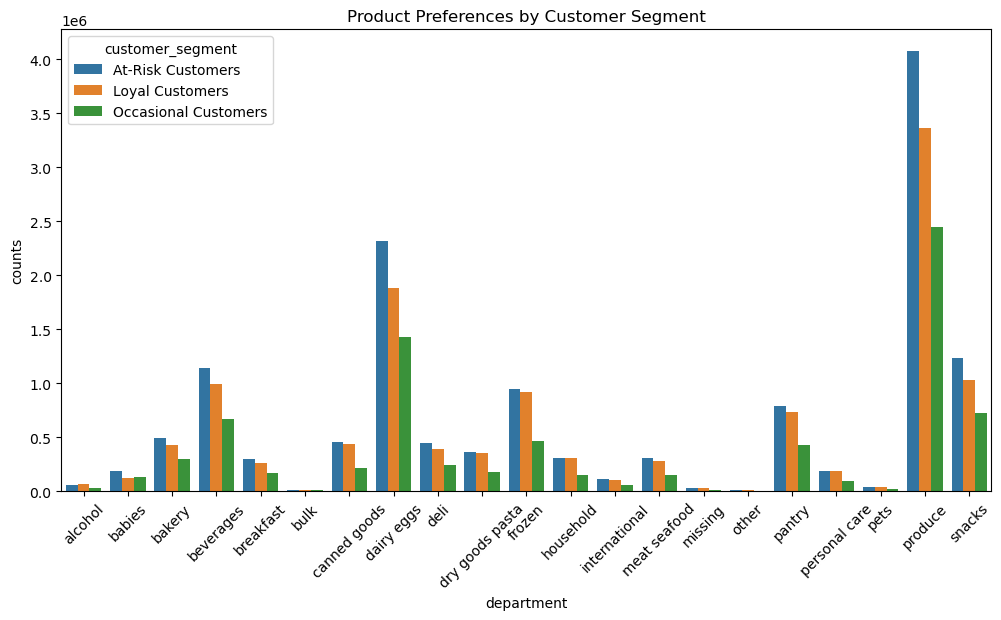

In [17]:
# Visualize product preferences by customer segment
plt.figure(figsize=(12, 6))
sns.barplot(x='department', y='counts', hue='customer_segment', data=product_preferences)
plt.title('Product Preferences by Customer Segment')
plt.xticks(rotation=45)
plt.show()


In [18]:
# Create descriptions for each customer segment
persona = {
    0: 'Loyal Customers: Frequent purchasers, low recency',
    1: 'At-Risk Customers: Higher recency, lower frequency',
    2: 'Occasional Customers: Medium recency and frequency'
}

# Add personas to the RFM data
rfm['persona'] = rfm['cluster'].map(persona)
print(rfm[['user_id', 'recency', 'frequency', 'persona']].head())


   user_id  recency  frequency  \
0        1      0.0         11   
1        2      3.0         15   
2        3      7.0         12   
3        4      0.0          5   
4        5      6.0          5   

                                             persona  
0  Loyal Customers: Frequent purchasers, low recency  
1  Loyal Customers: Frequent purchasers, low recency  
2  Loyal Customers: Frequent purchasers, low recency  
3  Loyal Customers: Frequent purchasers, low recency  
4  Loyal Customers: Frequent purchasers, low recency  


In [19]:
# Summarize actionable insights
print("Recommendations for Loyal Customers: Offer exclusive rewards and loyalty programs.")
print("Recommendations for At-Risk Customers: Send personalized re-engagement emails or offers.")
print("Recommendations for Occasional Customers: Promote frequent purchase incentives, cross-sell opportunities.")


Recommendations for Loyal Customers: Offer exclusive rewards and loyalty programs.
Recommendations for At-Risk Customers: Send personalized re-engagement emails or offers.
Recommendations for Occasional Customers: Promote frequent purchase incentives, cross-sell opportunities.


In [20]:
# Group by customer_segment and product_name to see what products are frequently bought
basket_analysis = rfm_orders.groupby(['customer_segment', 'product_name']).size().reset_index(name='counts')

# Preview the basket analysis results
print(basket_analysis.sort_values(by='counts', ascending=False).head(10))


            customer_segment            product_name  counts
3572       At-Risk Customers                  Banana  205764
52026        Loyal Customers                  Banana  166508
3371       At-Risk Customers  Bag of Organic Bananas  164365
100698  Occasional Customers                  Banana  119019
51821        Loyal Customers  Bag of Organic Bananas  116586
100522  Occasional Customers  Bag of Organic Bananas  113979
31110      At-Risk Customers    Organic Strawberries  113512
28079      At-Risk Customers    Organic Baby Spinach  105111
29516      At-Risk Customers    Organic Hass Avocado   91920
76915        Loyal Customers    Organic Baby Spinach   84993


In [21]:
pip install dash


Note: you may need to restart the kernel to use updated packages.


In [22]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Create Dash app
app = dash.Dash(__name__)

# Sample plot with your RFM data
fig = px.scatter(rfm, x='recency', y='frequency', color='cluster', title="Customer Segmentation")

# Layout of the dashboard
app.layout = html.Div(children=[
    html.H1(children='Customer Segmentation Dashboard'),
    dcc.Graph(
        id='rfm-graph',
        figure=fig
    ),
    html.Div(children='Explore customer segments based on Recency and Frequency.'),
])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


In [23]:
app.layout = html.Div([
    html.H1("Customer Segmentation Dashboard"),
    dcc.Dropdown(
        id='segment-filter',
        options=[{'label': s, 'value': s} for s in rfm['customer_segment'].unique()],
        value='Loyal Customers'
    ),
    dcc.Graph(id='filtered-graph'),
])

@app.callback(
    Output('filtered-graph', 'figure'),
    [Input('segment-filter', 'value')]
)
def update_graph(selected_segment):
    filtered_data = rfm[rfm['customer_segment'] == selected_segment]
    fig = px.scatter(filtered_data, x='recency', y='frequency', color='cluster')
    return fig
